In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
ty=[]
data=[]
label=[]
file = open("ex2data1.csv","r",encoding='utf-8-sig')
datas = csv.reader(file)
for line in datas:
    ty = list(map(float, line[:2]))
    la=list(map(int,line[2]))
    data.append(ty)
    label.append(la)
file.close()
print(np.shape(np.array(label)))

(100, 1)


In [227]:
label=np.reshape(np.array(label),(100,))
pos1 = [i for i in range(len(label)) if label[i]==1]
pos0 = [i for i in range(len(label)) if label[i]==0]

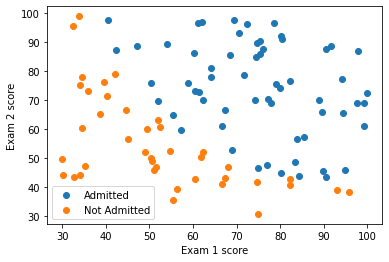

In [228]:
np_data=np.array(data)
a,b=np.split(np_data, 2, axis=1)
a=a.flatten()
b=b.flatten()

plt.scatter(a[pos1], b[pos1], label='Admitted')
plt.scatter(a[pos0], b[pos0], label='Not Admitted')

plt.legend(loc='best')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

In [229]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(np_data, label,test_size=0.1,random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(2,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=300, batch_size=5, verbose=0)


In [243]:
Z = model.predict(x_test)
z=np.argmax(Z,1)
for i in z:
    if i==0:
        print('불합격')
    elif i==1:
        print('합격')

print(np.argmax(y_test,1))

합격
불합격
불합격
합격
불합격
불합격
합격
합격
불합격
불합격
[1 0 0 0 0 0 0 1 0 0]


In [236]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = np.argmax(Z,1)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    label=np.argmax(y,1)
    pos1 = [i for i in range(len(label)) if label[i]==1]
    pos0 = [i for i in range(len(label)) if label[i]==0]
    a,b=np.split(X, 2, axis=1)
    a=a.flatten()
    b=b.flatten()
    # 샘플의 산점도를 그립니다
    plt.scatter(a[pos0],b[pos0],alpha=0.8,c=colors[0],marker=markers[0],label='0',edgecolor='black')
    plt.scatter(a[pos1],b[pos1],alpha=0.8,c=colors[1],marker=markers[1],label='1',edgecolor='black')

C:\Users\user\AppData\Local\Temp/ipykernel_4228/1819446285.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(a[pos1],b[pos1],alpha=0.8,c=colors[1],marker=markers[1],label='1',edgecolor='black')


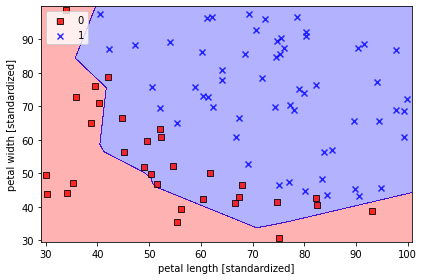

In [237]:
plot_decision_regions(X=x_train, y=y_train, classifier=model)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()